# 1. Business Understanding
There is no real business understanding, but we want to estimate the survival of the passengers in the Titanic.

In [49]:
# Running some import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# 2. Data Understanding 
Exploratory Data Analysis (EDA) Phase

we simply load and try to analyze the data set from the scratch

In [50]:
#load the data set
df = pd.read_csv('../data/titanic/train.csv')
#check the first 5 rows of the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
#access a single cell (column and row), you can replace the 'Name' column or row number
df['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [52]:
#get the shape of the data set, in (x,y) form, x is the number of rows, y is the number of columns
df.shape

(891, 12)

In [53]:
# get the types of the columns. 
#int64 means numeric in integer form, 
#float64 means numeric in float form 
#object means nominal (non-numeric) data 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
#we try to understand the distribution of male / female
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Data seems like imbalanced. Althoug the imbalanced data can create problem for most of the machine learning algorithms, 577 to 314 doesn't seem like a very big problem. Please keep in mind if the ration is something like 90% 10%. Also, you can try SMOTE or other methods for balancing data but for now I will not go in this way. 

<Axes: xlabel='Sex'>

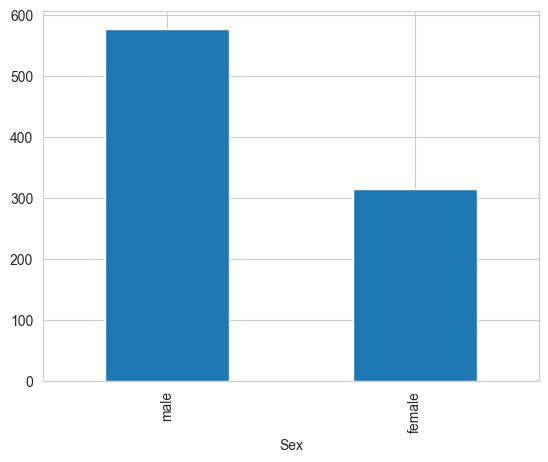

In [55]:
df['Sex'].value_counts().plot.bar()

<Axes: xlabel='Age'>

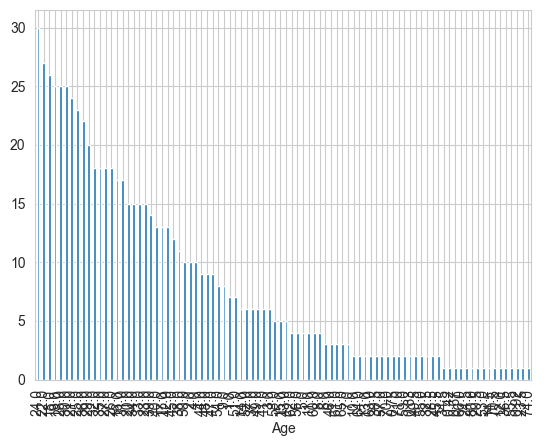

In [56]:
df['Age'].value_counts().plot.bar()

In [57]:
# survived is the target column. We try to get the distribution of survive
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

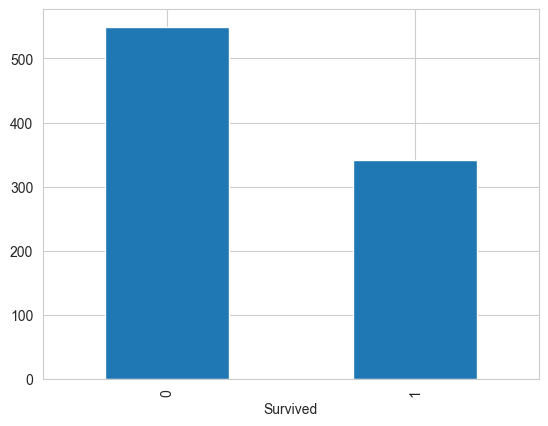

In [58]:
df['Survived'].value_counts().plot.bar()

In [59]:
df[ df['Sex'] == 'male']['Survived'].value_counts()

Survived
0    468
1    109
Name: count, dtype: int64

So, we can see the distribution of survived column, only for males

In [60]:
df[ df['Sex'] == 'female']['Survived'].value_counts()

Survived
1    233
0     81
Name: count, dtype: int64

Or, the distribution of survive for the female passengers

In [61]:
df[ ['Sex','Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

In [62]:
#lets convert the above summary table to data frame
x = df[ ['Sex','Survived']].value_counts()
result = pd.DataFrame(x).reset_index()
result = pd.DataFrame(x, columns = ['Sex/Survived'])

# result.columns = ['Sex', 'Survived', 'Count']
result

,Sex/Survived


In [63]:
#furthermore you can also create a pivot table 
df[['Sex','Survived','Age']].pivot_table(index = 'Sex', columns = 'Survived')

Age           
Survived          0          1
Sex                           
female    25.046875  28.847716
male      31.618056  27.276022

In [64]:
#it is a good idea to remove the id columns, lets firs check the content
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [65]:
#now we can remove it (passenger id column from the data set)
df.drop('PassengerId', axis = 1, inplace = True)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [66]:
# describe function also provides useful information about numeric columns 
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above table shows some important information:
- Age column has missing values
- only 38.3% of the passengers survived
- Average fare of ticket is 32 while the 75% of passengers got the ticket below 32, which means the fare column is a skewed column.
- Pclass column has min 1 and 25% 2 and 50% 3 values, which means majority of the data is in 3rd class
- Parch is min 0 and max 6 while 75% is 0, which means majority of the passengers travel alone.

you can also add more comments from the above table.

In [67]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
#Another important EDA is correlation table
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In the correlation table, there are two major checks we do in EDA phase. 
1. Which columns are highly correlated with target column (Survived). So we can focus on the highly correlated columns to build our model. 
2. Which columns are correlated with each other. So perhaps we can eliminate some highly correlated columns. 

Please keep in mind, the negative correlation is also a correlation, so the lowest relation between columns is 0.

<Axes: >

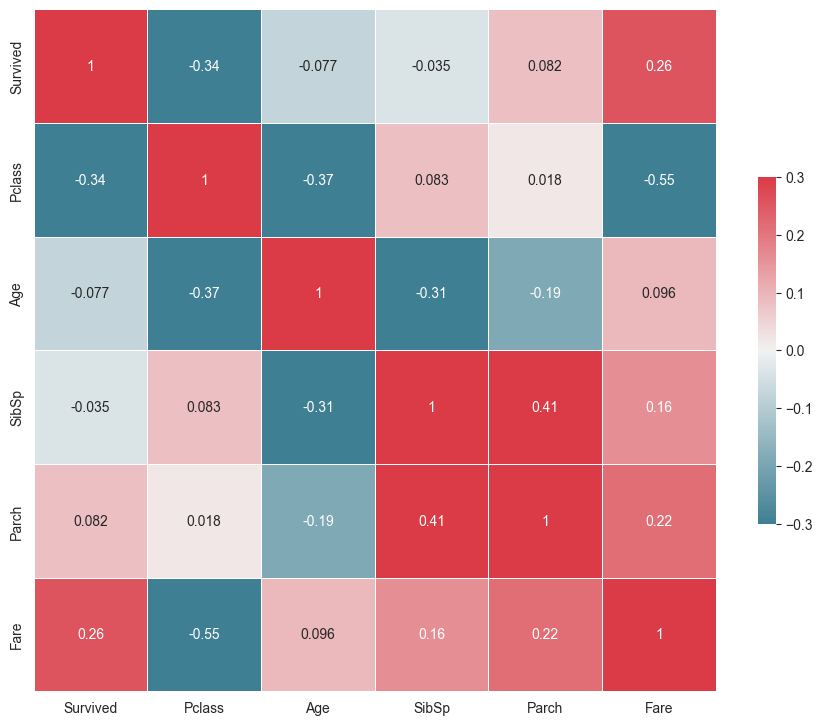

In [69]:
from matplotlib import pyplot as plt

# For this example we'll use Seaborn, which has some nice built in plots
import seaborn as sns
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    df.corr(numeric_only=True),          # The data to plot
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

# 3. Data Preparation
## Data Conversion from Categoric to Numeric

Most of the machine learning algorithms takes the input in numeric form. Second phase of the CRISP-DM is data preprocessing and we will try to implement some feature engineering / data conversion techniques. 

In [70]:
#let's check the data types first
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [71]:
# lets see the content of a nominal column Sex
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [72]:
# lets see the content of a nominal column Embarked
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [73]:
# now we can convert the Embarked column to numeric
# since we have 3 options like C, Q and S, we can use the one-hot-encoding
# instead of the one hot encoding transformation from pandas we can use get_dummies from sklearn
temp = pd.get_dummies(df['Embarked'])

# now we can add the new columns to the original data frame
df = pd.concat([df,temp],axis= 1)

# we dont need the nominal column anymore, so lets remove it
df.drop('Embarked', axis = 1, inplace = True)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True


In [74]:
# similar to the 'Embarked' column, we transform the Sex column to numeric
# this case we have a risk of dummy variable trap
# so we simply use the pandas replacer
temp = df['Sex'].replace({'male':1,'female':0})

# remove the nominal column from data set
df.drop('Sex',axis = 1,inplace=True)

# add transformed data set to the original dataset
df  = pd.concat([df,temp],axis = 1)
df.head(3)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Sex
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,0


**The Dummy Variable Trap** occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

Using the one-hot encoding method, a new dummy variable is created for each categorical variable to represent the presence (1) or absence (0) of the categorical variable. For example, if tree species is a categorical variable made up of the values pine or oak, then tree species can be represented as a dummy variable by converting each variable to a one-hot vector. This means that a separate column is obtained for each category, where the first column represents if the tree is pine and the second column represents if the tree is oak. Each column will contain a 0 or 1 if the tree in question is of the column's species. These two columns are multi-collinear since if a tree is pine, then we know it's not oak and vice versa.

In [75]:
# lets see the new correlation matrix
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,-0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,-0.182333
C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,-0.082853
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.074115
S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,0.125722
Sex,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,1.000000


In [76]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
C              bool
Q              bool
S              bool
Sex           int64
dtype: object

In [77]:
# now we have 3 more columns to convert numeric, lets continue with name
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Name column is similar to the ID column and most of the time we dont use it as an input to the machine learning algorithms. But it provides useful information sometimes. For example you can extract the gender, or ethnicity from the names of people. For the titanic data set we will use the titles like Mr., Dr. or Sir in the names. 

In [78]:
# let's check if the name column contains any of these titles.
# Convert Name from object to string
df['Name'] = df['Name'].astype(str)
temp = df['Name'].str.contains('Mr\.') | df['Name'].str.contains('Dr\.') | df['Name'].str.contains('Sir')
# please note that we use \ symbol before. because it is a regular expression

# now let's convert the outcome to numeric
temp = temp.to_frame().replace({True:1,False:0})

#remove the original name column now, we dont neet it anymore
df.drop('Name',axis = 1,inplace = True)

#concatenate the original data frame with the titles
df = pd.concat([df,temp],axis = 1)
df.head(5)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_1805/1211619973.py:4: SyntaxWarning: invalid escape sequence '\.'
  temp = df['Name'].str.contains('Mr\.') | df['Name'].str.contains('Dr\.') | df['Name'].str.contains('Sir')
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_1805/1211619973.py:4: SyntaxWarning: invalid escape sequence '\.'
  temp = df['Name'].str.contains('Mr\.') | df['Name'].str.contains('Dr\.') | df['Name'].str.contains('Sir')


,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Sex,Name
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,1,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,True,False,False,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,0,0
3,1,1,35.0,1,0,113803,53.1000,C123,False,False,True,0,0
4,0,3,35.0,0,0,373450,8.0500,NaN,False,False,True,1,1


In [79]:
# lets see the correlation of new dataframe
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,-0.543351,-0.546564
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.131900,0.120024
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523,0.093254,0.224985
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.114631,-0.249587
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,-0.245489,-0.343597
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,-0.182333,-0.177752
C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,-0.082853,-0.064095
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.074115,-0.076078
S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,0.125722,0.109771
Sex,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,1.000000,0.878744


<Axes: >

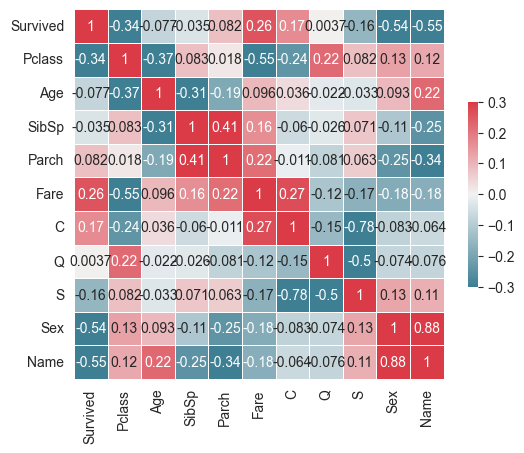

In [80]:
#  lets also draw the heat map of the correlation matrix now
sns.heatmap(
    df.corr(numeric_only=True),          # The data to plot
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

Above correlation matrix, show the newly added name colum (which is the title column in fact) has the highest correlation with the target column, Survived. Also the Sex and Name columns are highly correlated. 

In [81]:
#finally we have 2 more columns in categoric form, the Cabin and Ticket, I dont have any idea about 
# the Cabin or ticket or any ways to convert them to numeric so I will drop them.
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
C              bool
Q              bool
S              bool
Sex           int64
Name          int64
dtype: object

In [82]:
df.drop(['Cabin','Ticket'], axis = 1, inplace = True)
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
0,0,3,22.0,1,0,7.2500,False,False,True,1,1
1,1,1,38.0,1,0,71.2833,True,False,False,0,0
2,1,3,26.0,0,0,7.9250,False,False,True,0,0


In [83]:
# lets see what we have now:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Name
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.589226
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.492251
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


The problem resides now is the missing values in age column. We can implement many different imputation techniques like removing the missing columns, filling the missing values with a scalar value or the mean of the column or median of the column, but I will prefer to go the KNNImputer path. 
KNN Imputer is a technique to find the closest 5 neighbors by other columns and getting the average age of these 5 neighbors. 

Please remember, we need normalization for the KNN techniques, since they use the distance functions. 

In [84]:
#lets implement the min-max scaler and set min = 0 and max = 1
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df = pd.DataFrame( mms.fit_transform(df), columns = df.columns)
#lets check the maximum, avarega values 
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858,0.188552,0.086420,0.722783,0.647587,0.589226
std,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995,0.391372,0.281141,0.447876,0.477990,0.492251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#now we can implement the knn imputer and fill the blanks with the average of 5 nearest neighbors
from sklearn.impute import KNNImputer
knni = KNNImputer()
df = pd.DataFrame( knni.fit_transform(df), columns = df.columns)
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0


# 3. Data Preparation (continued)
## Feature importance / Elimination

As a sub phase of feature engineering we also need to check the importance of the features. Although we have already checked the correlation matrix, we can also use regression or decision trees for the feature importances. 

In [86]:
# lets try to build a linear regression between age and survived columns
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[['Age']],df[['Survived']])
lr.coef_

array([[-0.28842297]])

The linear regression tries to build a line between age and survived axises. the formula of linear regression is y = ax+b and in this case a, which is the slope between x and y, is -0.29. From this coefficient we can conclude there is a weak relation between survived and age columns. 

In [87]:
#we can also see the slope between all columns to all columns in a matrix
regmat = []
for col in df.columns:
    satirlar = []
    for row in df.columns:
        lr.fit(df[[row]],df[col])
        x = lr.coef_[0]
        satirlar += [ round(x, 2) ]
    regmat += [satirlar]

sonuc = pd.DataFrame(regmat, columns = df.columns, index = df.columns)
sonuc

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
Survived,1.00,-0.39,-0.29,-0.12,0.30,1.29,0.21,0.01,-0.17,-0.55,-0.54
Pclass,-0.29,1.00,-0.90,0.25,0.06,-2.37,-0.26,0.33,0.08,0.12,0.10
Age,-0.04,-0.16,1.00,-0.41,-0.29,0.16,0.01,0.02,-0.02,0.06,0.10
SibSp,-0.01,0.03,-0.24,1.00,0.43,0.23,-0.02,-0.01,0.02,-0.03,-0.07
Parch,0.02,0.01,-0.16,0.40,1.00,0.30,-0.00,-0.04,0.02,-0.07,-0.09
Fare,0.05,-0.13,0.05,0.11,0.16,1.00,0.07,-0.04,-0.04,-0.04,-0.04
C,0.14,-0.23,0.04,-0.17,-0.03,1.09,1.00,-0.21,-0.68,-0.07,-0.05
Q,0.00,0.15,0.05,-0.05,-0.17,-0.34,-0.11,1.00,-0.31,-0.04,-0.04
S,-0.14,0.09,-0.10,0.23,0.21,-0.77,-0.89,-0.79,1.00,0.12,0.10
Sex,-0.53,0.15,0.43,-0.40,-0.87,-0.90,-0.10,-0.13,0.13,1.00,0.85


In [88]:
# or we can create another matrix from the intercept values (which is the b value in y = ax+b formula)
regmat = []
for col in df.columns:
    satirlar = []
    for row in df.columns:
        lr.fit(df[[row]],df[col])
        x = lr.intercept_
        satirlar += [ round(x, 2) ]
    regmat += [satirlar]

sonuc = pd.DataFrame(regmat, columns = df.columns, index = df.columns)
sonuc

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Sex,Name
Survived,-0.00,0.64,0.49,0.39,0.37,0.30,0.34,0.38,0.51,0.74,0.70
Pclass,0.77,0.00,0.99,0.64,0.65,0.80,0.70,0.63,0.60,0.58,0.59
Age,0.38,0.48,-0.00,0.40,0.39,0.36,0.37,0.37,0.38,0.33,0.31
SibSp,0.07,0.05,0.16,0.00,0.04,0.05,0.07,0.07,0.05,0.09,0.11
Parch,0.05,0.06,0.12,0.04,-0.00,0.04,0.06,0.07,0.05,0.11,0.12
Fare,0.04,0.15,0.05,0.06,0.05,-0.00,0.05,0.07,0.09,0.09,0.08
C,0.14,0.34,0.18,0.20,0.19,0.12,-0.00,0.21,0.68,0.23,0.22
Q,0.09,-0.01,0.07,0.09,0.10,0.11,0.11,-0.00,0.31,0.11,0.11
S,0.78,0.67,0.76,0.71,0.71,0.77,0.89,0.79,-0.00,0.65,0.66
Sex,0.85,0.55,0.49,0.67,0.70,0.70,0.67,0.66,0.55,-0.00,0.14


In [89]:
# another technique for the feature importance is using a machine learning and getting the
# feature importances. 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
X = df.drop('Survived', axis = 1)
y = df['Survived']
rfc.fit(X,y)
pred = rfc.predict(X)

In [90]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y,pred)
acc

0.9910213243546577

Please note that 99% accuracy is not a good sign. Most probably an over fitting sign. So, lets divide our data set into train and test parts by using the train/test split.

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [92]:
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

0.8135593220338984

now, we have a better result without over fitting effect. 80% is quite good but lets turn back to the feature importances first. 

In [93]:
rfc.feature_importances_

array([0.08846686, 0.26240766, 0.05230076, 0.03593932, 0.23916275,
       0.01721973, 0.00708871, 0.01849776, 0.1520059 , 0.12691056])

highger value on above list indicates, higher importance. If you want to remember which value is which column lets print out the name of columns:

In [94]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Sex',
       'Name'],
      dtype='object')

We can conclude the highest importance is for Age column, Fare follows it and than Sex and Name columns comes next. Alsoi you can think about the train test split draw backs. After all the splitting point is a problem and we can try the cross validation technique for the same random forest classifier algorithm:

# 4. modeling

Now we can proceed to the modelling phase of the CRIPS-DM. We have already started the modelling with random forest classifier and the linear regression but now we can handle the problem with trying some famous algorithms. Let's start with the cross validation of RFC.

In [95]:
#lets get cv = 3 so the data set will be divided into 3 parts and 2 of them will be the training set
from sklearn.model_selection import cross_validate
scores = cross_validate(rfc, X, y, cv=3,
                       scoring=('accuracy'),
                       return_train_score=True)
scores

{'fit_time': array([0.07265306, 0.06652689, 0.0655849 ]),
 'score_time': array([0.00490594, 0.0049572 , 0.00480413]),
 'test_score': array([0.7979798 , 0.81481481, 0.79124579]),
 'train_score': array([0.996633  , 0.99494949, 0.98989899])}

all three executions yields the similar results around 80%

We can now start testing the algorithms listed below:
- Logistic Regression.
- Naive Bayes.
- K-Nearest Neighbors.
- Decision Tree.
- Support Vector Machines.
- KMeans
- gradient boosting classifier

In [112]:
#Algorithm importing and definitions
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.svm import SVC
svc = SVC()
from sklearn.cluster import KMeans
km = KMeans()
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

#we create a list for algorihthms and another list for the name of the algorithms
algos = [lr,gnb,knn,dtc,svc,km,gbc,rfc]
algo_names = ['LogisticRegression','GaussianNB','KNeighborsClassifier',
             'DecisionTreeClassifier','SVC','KMeans','GradientBoostingClassifier',
             'RandomForestClassifier']

# lets get the score of each algorithm by using the accuracy
scores = []
algos_n = []
for i in range(len(algos)):
    temp = cross_validate(algos[i], X, y, cv=3,
                       scoring=('accuracy'),
                       return_train_score=True)
    algos_n += [algo_names[i]]
    scores += [temp]
scores

/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[{'fit_time': array([0.0033679 , 0.00285316, 0.00279784]),
  'score_time': array([0.00078511, 0.00057817, 0.00077891]),
  'test_score': array([0.7979798 , 0.81144781, 0.79461279]),
  'train_score': array([0.82491582, 0.81818182, 0.80808081])},
 {'fit_time': array([0.000844  , 0.00067115, 0.00065589]),
  'score_time': array([0.00056696, 0.0005188 , 0.00051212]),
  'test_score': array([0.77777778, 0.7979798 , 0.79461279]),
  'train_score': array([0.81818182, 0.7996633 , 0.7962963 ])},
 {'fit_time': array([0.00068402, 0.00074983, 0.00081205]),
  'score_time': array([0.0059948 , 0.00579715, 0.0054667 ]),
  'test_score': array([0.82154882, 0.8047138 , 0.81818182]),
  'train_score': array([0.87373737, 0.86868687, 0.85521886])},
 {'fit_time': array([0.00142503, 0.00134301, 0.00119495]),
  'score_time': array([0.00054812, 0.000494  , 0.00052619]),
  'test_score': array([0.76430976, 0.76767677, 0.75757576]),
  'train_score': array([0.996633  , 0.99494949, 0.98989899])},
 {'fit_time': array([0.0

In [125]:
# lets see the results and format them to see the accuracy of each algorithm
# Convert scores list to a pandas DataFrame
scores_df = pd.DataFrame(algos_n, columns=['Algorithm'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores)], axis=1) #, columns=['Algorithm', 'Scores'])
# Extract test scores into a separate column
# scores_df['Test_Score'] = scores_df['Scores'].apply(lambda x: x['test_score'].mean())

# Now you can drop the Scores column
# scores_df = scores_df.drop(columns=['Scores'])

# Print the DataFrame
scores_df

,Algorithm,fit_time,score_time,test_score,train_score
0,LogisticRegression,"[0.003367900848388672, 0.0028531551361083984, ...","[0.0007851123809814453, 0.0005781650543212891,...","[0.797979797979798, 0.8114478114478114, 0.7946...","[0.8249158249158249, 0.8181818181818182, 0.808..."
1,GaussianNB,"[0.0008440017700195312, 0.0006711483001708984,...","[0.0005669593811035156, 0.000518798828125, 0.0...","[0.7777777777777778, 0.797979797979798, 0.7946...","[0.8181818181818182, 0.7996632996632996, 0.796..."
2,KNeighborsClassifier,"[0.0006840229034423828, 0.0007498264312744141,...","[0.0059947967529296875, 0.005797147750854492, ...","[0.8215488215488216, 0.8047138047138047, 0.818...","[0.8737373737373737, 0.8686868686868687, 0.855..."
3,DecisionTreeClassifier,"[0.001425027847290039, 0.0013430118560791016, ...","[0.0005481243133544922, 0.0004940032958984375,...","[0.7643097643097643, 0.7676767676767676, 0.757...","[0.9966329966329966, 0.9949494949494949, 0.989..."
4,SVC,"[0.0033829212188720703, 0.003665924072265625, ...","[0.004762172698974609, 0.004920005798339844, 0...","[0.8148148148148148, 0.8417508417508418, 0.804...","[0.8383838383838383, 0.8282828282828283, 0.826..."
5,KMeans,"[0.01081395149230957, 0.009803056716918945, 0....","[0.0007309913635253906, 0.0011849403381347656,...","[0.24579124579124578, 0.037037037037037035, 0....","[0.27441077441077444, 0.04377104377104377, 0.3..."
6,GradientBoostingClassifier,"[0.0505068302154541, 0.050086259841918945, 0.0...","[0.0010981559753417969, 0.0010809898376464844,...","[0.8047138047138047, 0.8484848484848485, 0.818...","[0.9259259259259259, 0.9276094276094277, 0.914..."
7,RandomForestClassifier,"[0.06700420379638672, 0.06632018089294434, 0.0...","[0.004663944244384766, 0.004895925521850586, 0...","[0.8013468013468014, 0.8249158249158249, 0.791...","[0.9966329966329966, 0.9949494949494949, 0.989..."


Gradient boosting classifier seems the best, SVC, KNN and RFC follows it in the given order. 

# Deployment Phase

Now, we can create our pipe line for training and scoring the test.csv file. 

In [48]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
temp = pd.get_dummies(df['Embarked'])
df = pd.concat([df,temp],axis= 1)
df.drop('Embarked', axis = 1, inplace = True)

temp = df['Sex'].replace({'male':1,'female':0})
df.drop('Sex',axis = 1,inplace=True)
df  = pd.concat([df,temp],axis = 1)

temp = df['Name'].str.contains('Mr\.') | df['Name'].str.contains('Dr\.') | df['Name'].str.contains('Sir')
temp = temp.to_frame().replace({True:1,False:0})
df.drop('Name',axis = 1,inplace = True)
df = pd.concat([df,temp],axis = 1)

df.drop(['Cabin','Ticket','PassengerId'], axis = 1 , inplace = True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
pipe = Pipeline([('Min Max Scaler', MinMaxScaler()), ('KNN Imputer', KNNImputer()),
                ('GradientBoostingClassifier',GradientBoostingClassifier())])

X = df.drop('Survived', axis = 1)
y = df['Survived']
pipe.fit(X,y)
y_pred = pipe.predict(X)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y,y_pred)
acc



0.9023569023569024

# Scoring Test.CSV and Submission

In [49]:
#load the test data set
df = pd.read_csv('/kaggle/input/titanic/test.csv')
#check the first 3 rows of the data
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [50]:
temp = pd.get_dummies(df['Embarked'])
df = pd.concat([df,temp],axis= 1)
df.drop('Embarked', axis = 1, inplace = True)

temp = df['Sex'].replace({'male':1,'female':0})
df.drop('Sex',axis = 1,inplace=True)
df  = pd.concat([df,temp],axis = 1)

temp = df['Name'].str.contains('Mr\.') | df['Name'].str.contains('Dr\.') | df['Name'].str.contains('Sir')
temp = temp.to_frame().replace({True:1,False:0})
df.drop('Name',axis = 1,inplace = True)
df = pd.concat([df,temp],axis = 1)

df.drop(['Cabin','Ticket','PassengerId'], axis = 1 , inplace = True)

sonuclar = pipe.predict(df)

In [51]:
df = pd.read_csv('/kaggle/input/titanic/test.csv')
df = df[['PassengerId']]
df['Survived'] = sonuclar
df.to_csv('sonuclar.csv', index = False)

In [52]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
